# Day5 Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [201]:
dataset = pd.read_csv('./salary_data/Partially Cleaned Salary Dataset.csv')
dataset.head()

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,4,Accenture,Data Scientist,32,Bangalore,944110.0


In [202]:
# drop salaries reported column
dataset = dataset.drop('Salaries Reported', axis=1)
dataset = dataset.drop('Company Name', axis=1)
# remove first column
dataset = dataset.iloc[:, 1:]
dataset.head()

,Job Title,Location,Salary
0,Data Scientist,Bangalore,648573.0
1,Data Scientist,Bangalore,1191950.0
2,Data Scientist,Bangalore,836874.0
3,Data Scientist,Bangalore,669578.0
4,Data Scientist,Bangalore,944110.0


In [203]:
print(dataset.isnull().sum())
# we do not need to remove/replace any missing values

Job Title    0
Location     0
Salary       0
dtype: int64


(array([4.323e+03, 5.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.08140000e+04, 1.10861170e+07, 2.21614199e+07, 3.32367229e+07,
        4.43120258e+07, 5.53873288e+07, 6.64626318e+07, 7.75379347e+07,
        8.86132377e+07, 9.96885406e+07, 1.10763844e+08, 1.21839147e+08,
        1.32914450e+08, 1.43989752e+08, 1.55065055e+08, 1.66140358e+08]),
 <BarContainer object of 15 artists>)

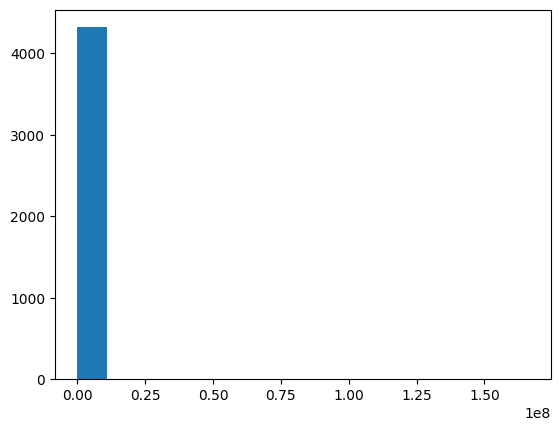

In [204]:
plt.hist(dataset["Salary"], bins=15)

In [205]:

lower_limit = dataset["Salary"].quantile(0.01)
print(lower_limit)

upper_limit = dataset["Salary"].quantile(0.99)
print(upper_limit)

dataset = dataset[(dataset["Salary"] > lower_limit) & (dataset["Salary"] < upper_limit)]
dataset.head()

72831.5
5010108.479999999


,Job Title,Location,Salary
0,Data Scientist,Bangalore,648573.0
1,Data Scientist,Bangalore,1191950.0
2,Data Scientist,Bangalore,836874.0
3,Data Scientist,Bangalore,669578.0
4,Data Scientist,Bangalore,944110.0


(array([ 962., 1242.,  805.,  514.,  311.,  173.,   92.,   60.,   30.,
          17.,   19.,    8.,    6.,    5.,    7.]),
 array([  73405.        ,  401844.66666667,  730284.33333333,
        1058724.        , 1387163.66666667, 1715603.33333333,
        2044043.        , 2372482.66666667, 2700922.33333333,
        3029362.        , 3357801.66666667, 3686241.33333333,
        4014681.        , 4343120.66666667, 4671560.33333333,
        5000000.        ]),
 <BarContainer object of 15 artists>)

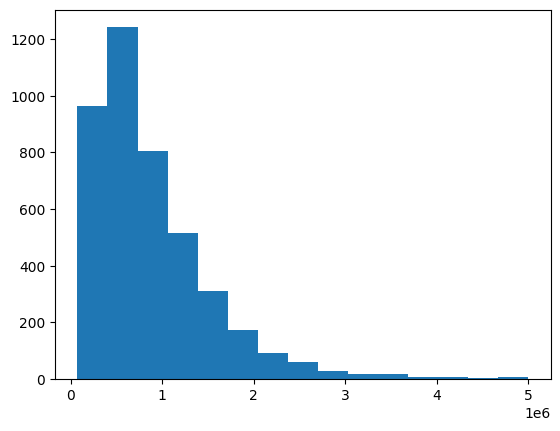

In [206]:
plt.hist(dataset["Salary"], bins=15)

In [207]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [213]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')

x = np.array(ct.fit_transform(x))

In [214]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

x_train, x_test, y_train, y_test

(array([[1., 0., 1., ..., 0., 0., 1.],
        [1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.]]),
 array([[1., 0., 1., ..., 0., 1., 0.],
        [1., 0., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 1., ..., 0., 0., 1.]]),
 array([4444315., 1242641.,  781491., ...,  571859., 1500000.,  549688.]),
 array([ 270780., 1223523.,  695052., ...,  624665.,  249732.,  619069.]))

In [215]:

import os
outdir = "./day5_results"
if not os.path.exists(outdir):
    os.mkdir(outdir)

# write x_train, x_test, y_train, y_test into their respective files
files = [["x_train.csv",x_train], ["x_test.csv",x_test], ["y_train.csv",y_train], ["y_test.csv",y_test]]
for file in files:
  DF = pd.DataFrame(file[1])
  file_path = outdir + "/" + file[0]
  DF.to_csv(file_path)